# Simple Linear Regression Using Tensorflow v2 High Level API


## Step 1 : Tips Data

Our tips data looks like this

```
| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 
```

In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
## Create some tips data in pandas

tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

tip_data

,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


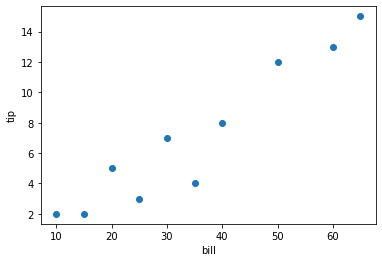

In [20]:
## Basic plot
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()

### Shape Input and Output
Our tips data looks pretty linear.  
Let's extract 'input' and 'output'

In [21]:
x = tip_data['bill'].values
y = tip_data['tip'].values
print('x (bill) = ' + str(x))
print('y (tip) = ' + str(y))


x (bill) = [50. 30. 60. 40. 65. 20. 10. 15. 25. 35.]
y (tip) = [12.  7. 13.  8. 15.  5.  2.  2.  3.  4.]


## Step 2 : Define a Simple Linear Model
It only has ONE neuron with ONE input

In [22]:
import tensorflow as tf
from tensorflow import keras  # using TF.Keras !



model = tf.keras.Sequential()
model.add (keras.layers.Dense(units=1, input_shape=[1]))

# optimizer = 'sgd'

## TODO : try these optimizers one-by-one to get better results

# optimizer='adam'
# optimizer=tf.keras.optimizers.SGD(0.001)
# optimizer=tf.keras.optimizers.SGD(0.01)
# optimizer=tf.keras.optimizers.RMSprop(0.001)
# optimizer=tf.keras.optimizers.RMSprop(0.01)
# optimizer=tf.keras.optimizers.RMSprop(0.1)
# optimizer=tf.keras.optimizers.Adam(0.001)
optimizer=tf.keras.optimizers.Adam(0.01)


model.compile(optimizer=optimizer, loss='mean_squared_error', 
             metrics = ['mean_squared_error'])

print (model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


## Step 3 : Train The Neural Network
This is where we supply our model 'input' data to train on.  
**Goal : We want the loss to as small as possible (if zero, it is perfect model!)**

In [23]:
%%time
## TODO : start with 100 epochs,
##         increase it (500, 1000) to see if accuracy improves

history = model.fit (x,y, epochs=100)

Train on 10 samples
Epoch 1/100
10/10 [==============================] - 0s 36ms/sample - loss: 173.8302 - mean_squared_error: 173.8302
Epoch 2/100
10/10 [==============================] - 0s 444us/sample - loss: 163.4731 - mean_squared_error: 163.4731
Epoch 3/100
10/10 [==============================] - 0s 378us/sample - loss: 153.4474 - mean_squared_error: 153.4474
Epoch 4/100
10/10 [==============================] - 0s 203us/sample - loss: 143.7585 - mean_squared_error: 143.7585
Epoch 5/100
10/10 [==============================] - 0s 258us/sample - loss: 134.4113 - mean_squared_error: 134.4113
Epoch 6/100
10/10 [==============================] - 0s 314us/sample - loss: 125.4100 - mean_squared_error: 125.4100
Epoch 7/100
10/10 [==============================] - 0s 359us/sample - loss: 116.7582 - mean_squared_error: 116.7582
Epoch 8/100
10/10 [==============================] - 0s 323us/sample - loss: 108.4586 - mean_squared_error: 108.4586
Epoch 9/100
10/10 [==========================

## Step 4 : Evaluate the Run
If you are seeing the loss value getting larger and larger  or seeing 'inf' or 'nan' values, your neural network is not converging :)  

Don't worry, it is an easy fix.  Change the optimizer above (uncomment one of the optimizers and try again)

## Step 4 : See Training Metrics

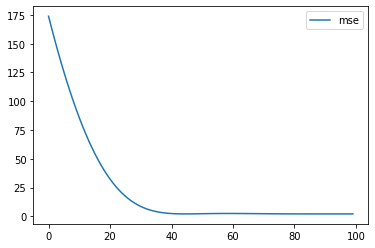

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

if 'mean_squared_error' in history.history:
    plt.plot(history.history['mean_squared_error'], label='mse')

plt.legend()
plt.show()

## Step 5 : Predict 
Now that our model is ready, lets predict tip for $100.  

**==> Q : How good is our neural network tip calculator? :-)**

In [25]:
predicted = model.predict([100.])
print ("predicted tip : ", predicted)

predicted tip :  [[21.732824]]
